# Step 1: Import Required Libraries
We'll use pandas for data handling, and matplotlib/seaborn for visualizations.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use valid style for Colab
plt.style.use('seaborn-v0_8-whitegrid')


# Step 2: Load the Ethereum Dataset
We're reading the `ETH-USD.csv` file you uploaded.

In [4]:
df = pd.read_csv('ETH-USD.csv')
df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


# Step 3: Convert 'Date' to datetime format and set it as index
This will prepare our data for time series analysis.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2015-08-08 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   High       2160 non-null   float64
 4   Low        2160 non-null   float64
 5   Open       2160 non-null   float64
 6   Close      2160 non-null   float64
 7   Volume     2160 non-null   float64
 8   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 168.8+ KB


# Step 4: Check and drop missing values
Missing values can affect forecasting models — we’ll remove them.


In [6]:
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)


Missing values:
 SNo          0
Name         0
Symbol       0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


# Step 5: Visualize Ethereum Closing Prices
We'll plot the historical closing prices to understand the overall trend.


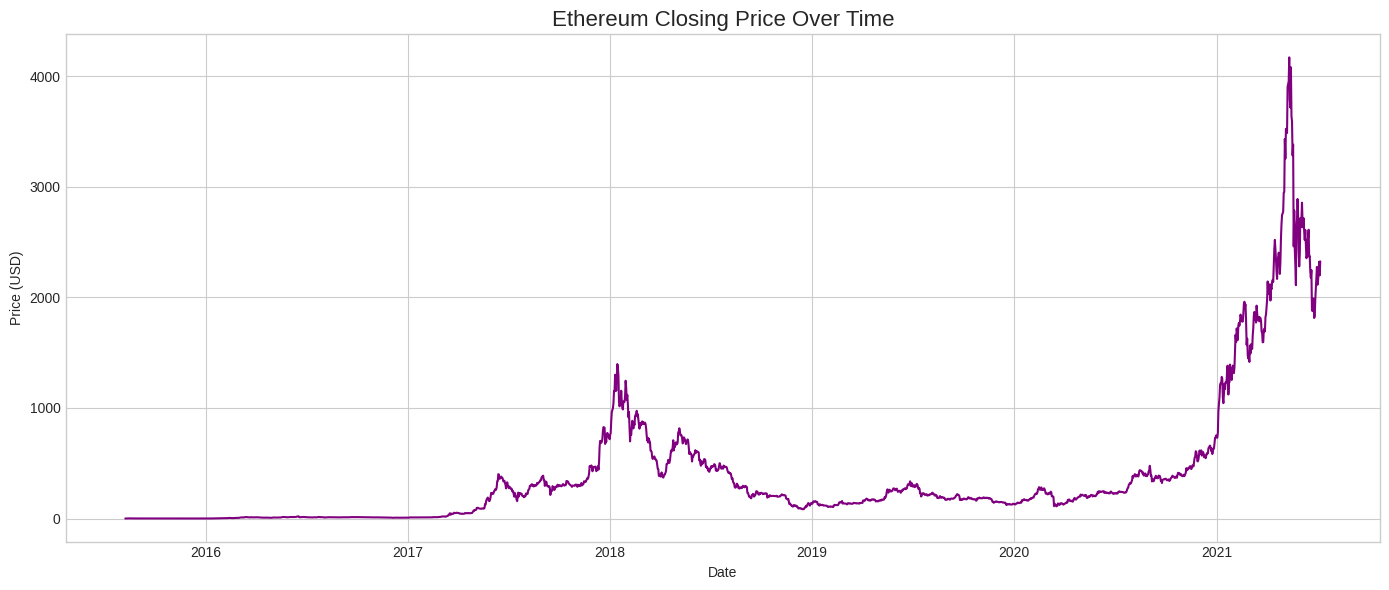

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], color='purple')
plt.title('Ethereum Closing Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


STEP 6: EDA – Time Series Analysis
# Step 6.1: Calculate and Plot Rolling Averages
We'll calculate 7-day and 30-day moving averages to smooth out short-term fluctuations.


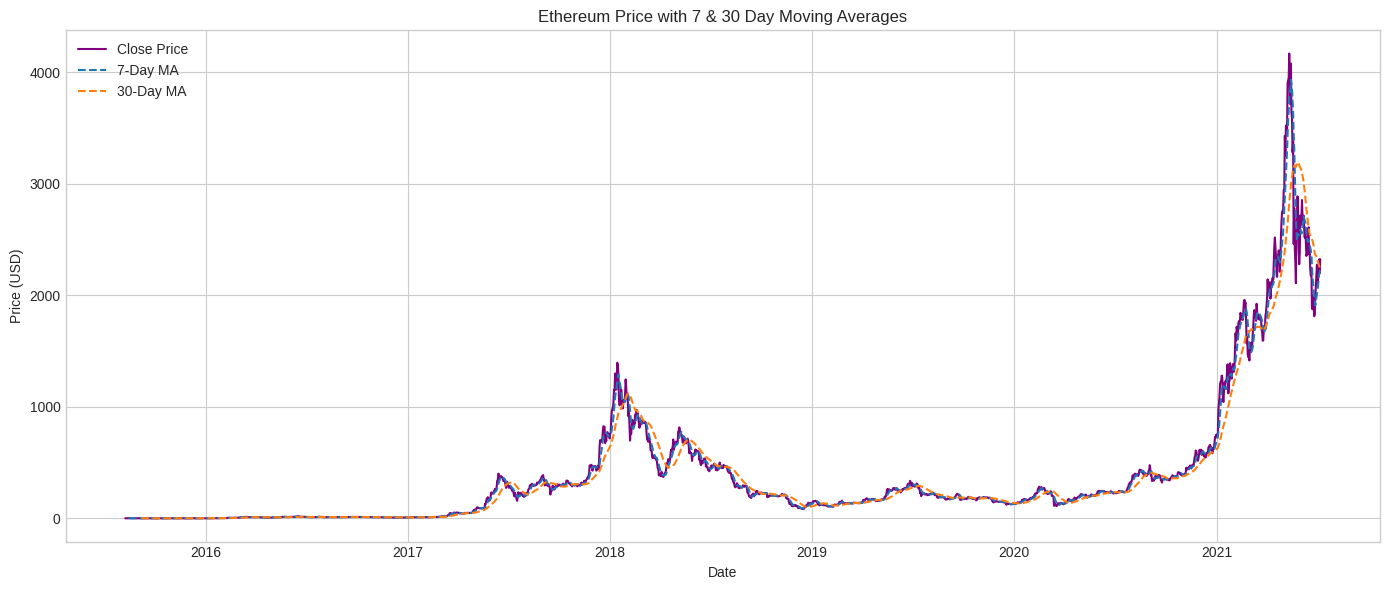

In [8]:
df['7-Day MA'] = df['Close'].rolling(window=7).mean()
df['30-Day MA'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='purple')
plt.plot(df['7-Day MA'], label='7-Day MA', linestyle='--')
plt.plot(df['30-Day MA'], label='30-Day MA', linestyle='--')
plt.title('Ethereum Price with 7 & 30 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()


# Step 6.2: Visualize Daily Volatility
We'll plot the percentage change in price to understand volatility.


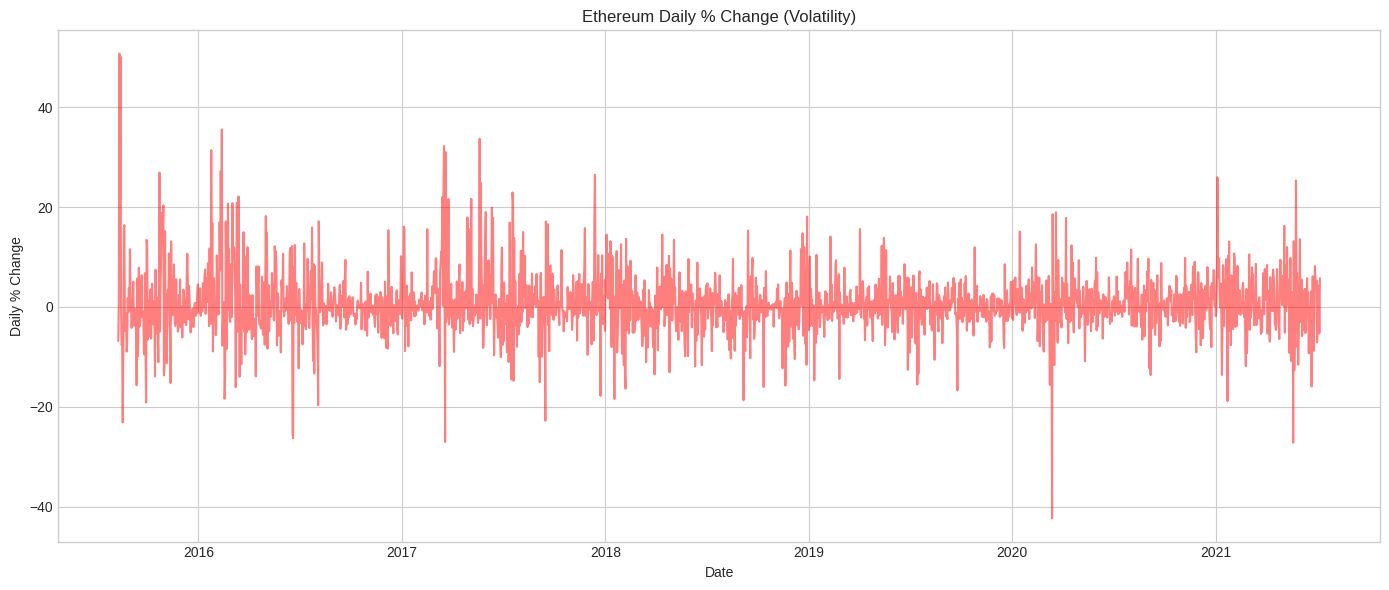

In [9]:
df['Daily Change %'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14,6))
plt.plot(df['Daily Change %'], color='red', alpha=0.5)
plt.title('Ethereum Daily % Change (Volatility)')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.tight_layout()
plt.show()


# Step 6.3: Correlation Heatmap
We'll check how numerical features like Open, Close, Volume are related.


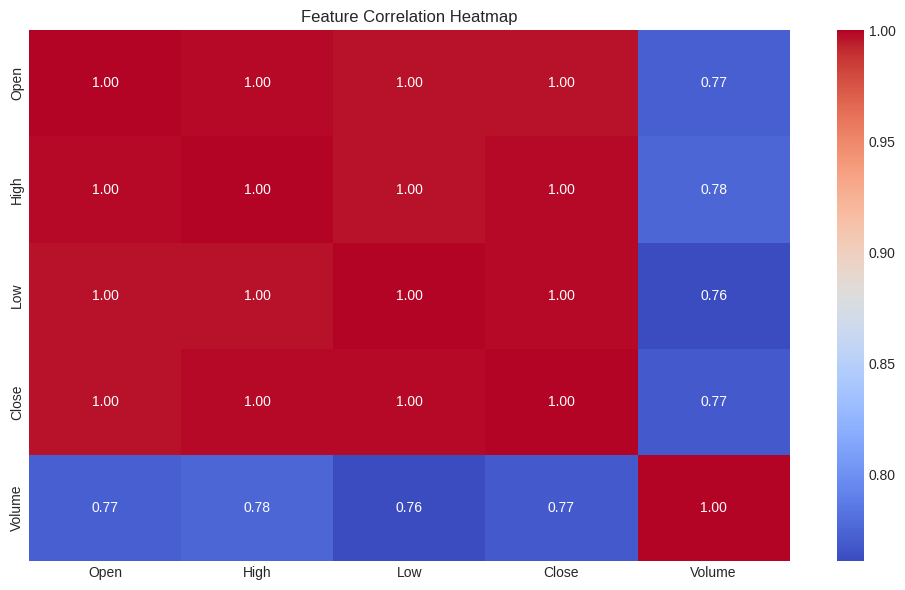

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


# Step 7.1: Visual Check for Stationarity
We'll zoom into a recent window to see if Ethereum prices show a stable pattern or trend.


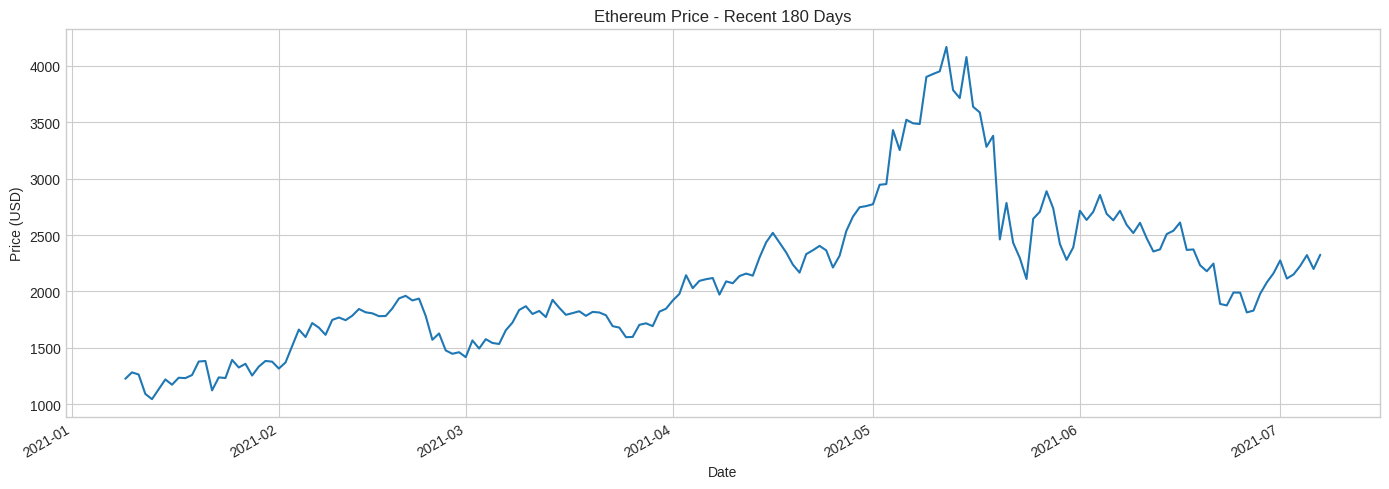

In [11]:
# Zoom into recent 180 days for clearer view
df['Close'].tail(180).plot(figsize=(14,5), title='Ethereum Price - Recent 180 Days')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


# Step 7.2: Augmented Dickey-Fuller (ADF) Test
This statistical test will help us check if the series is stationary.


In [12]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on 'Close' price
result = adfuller(df['Close'])

print("ADF Test Result:")
print(f"ADF Statistic  : {result[0]}")
print(f"p-value        : {result[1]}")
print(f"Critical Values: {result[4]}")


ADF Test Result:
ADF Statistic  : -0.026066281130864132
p-value        : 0.9563225993836116
Critical Values: {'1%': np.float64(-3.433419473570619), '5%': np.float64(-2.862895974588963), '10%': np.float64(-2.5674918550982277)}


# Step 7.3: Make the Series Stationary by Differencing
We'll subtract each value from the previous one to remove trends.


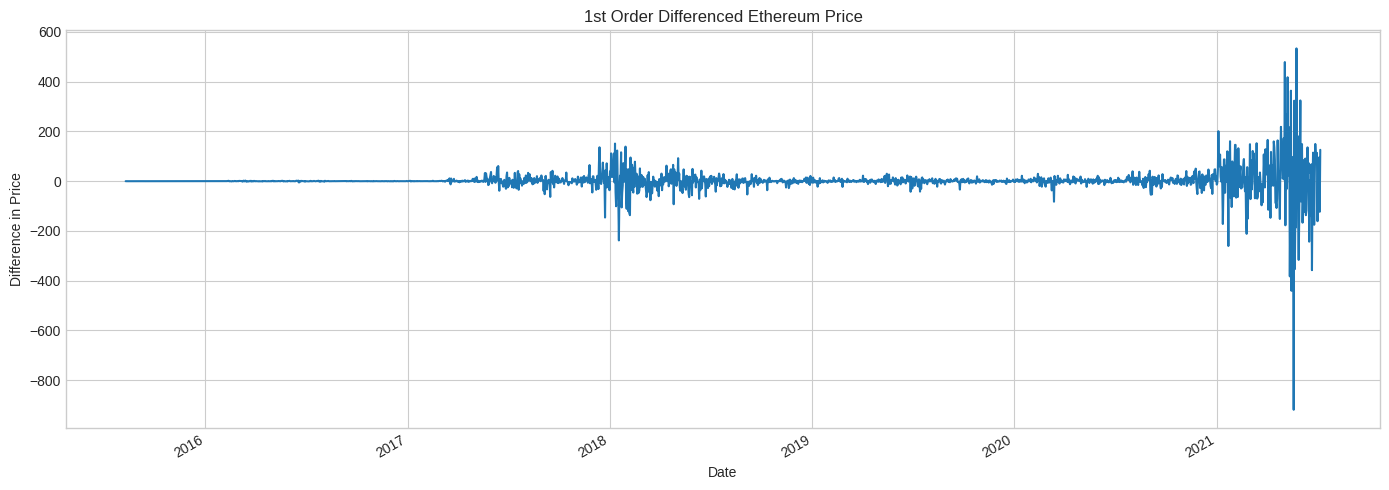

In [13]:
# First order differencing
df['Close_diff'] = df['Close'] - df['Close'].shift(1)
df['Close_diff'].dropna().plot(figsize=(14,5), title='1st Order Differenced Ethereum Price')
plt.ylabel('Difference in Price')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


# Step 7.4: Run ADF Test Again on Differenced Data
We'll check if the new series is now stationary.


In [14]:
result_diff = adfuller(df['Close_diff'].dropna())

print("ADF Test After Differencing:")
print(f"ADF Statistic  : {result_diff[0]}")
print(f"p-value        : {result_diff[1]}")
print(f"Critical Values: {result_diff[4]}")


ADF Test After Differencing:
ADF Statistic  : -9.80660399747097
p-value        : 5.803725004403697e-17
Critical Values: {'1%': np.float64(-3.433419473570619), '5%': np.float64(-2.862895974588963), '10%': np.float64(-2.5674918550982277)}


# Step 8.1: Plot ACF and PACF
These plots will help us estimate optimal values for `p` and `q` in ARIMA(p,d,q).


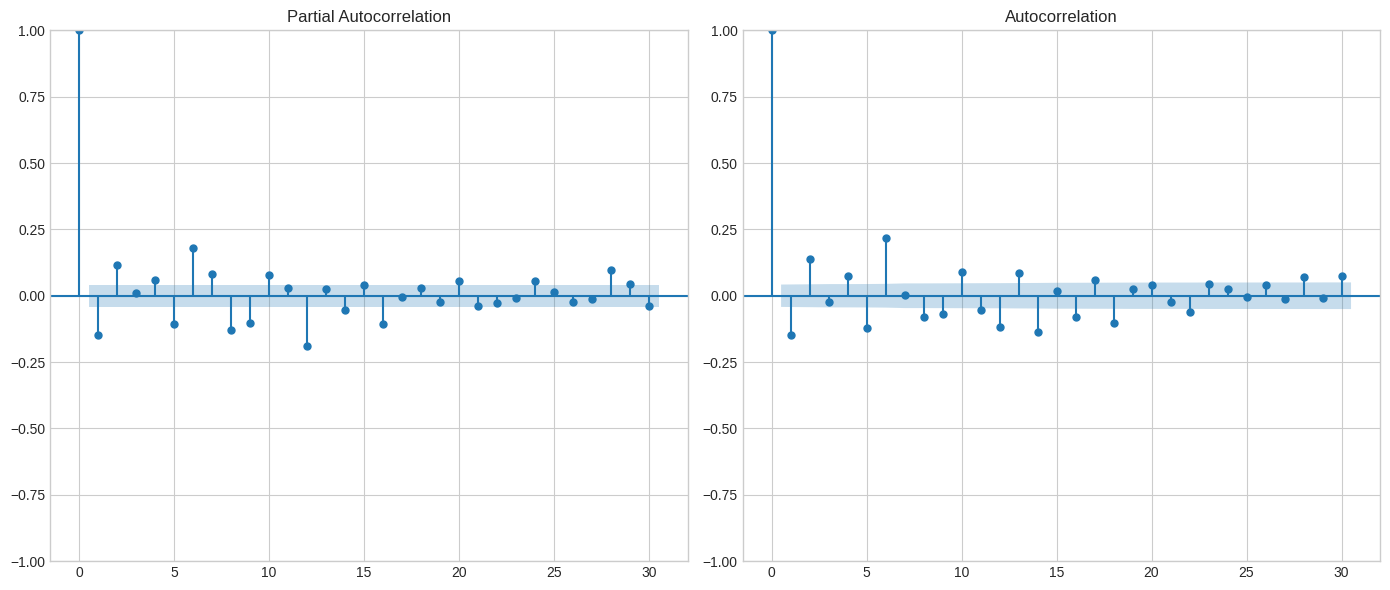

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Drop NaNs from differenced series
diff_series = df['Close_diff'].dropna()

# Set figure size
plt.figure(figsize=(14,6))

# PACF plot → to determine p
plt.subplot(1, 2, 1)
plot_pacf(diff_series, ax=plt.gca(), lags=30, method='ywm')

# ACF plot → to determine q
plt.subplot(1, 2, 2)
plot_acf(diff_series, ax=plt.gca(), lags=30)

plt.tight_layout()
plt.show()


# Step 9.1: Train ARIMA(1,1,1) Model
We'll train an ARIMA model using the `statsmodels` library on the Ethereum closing prices.


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Build and train the ARIMA model on original closing prices
model = ARIMA(df['Close'], order=(1,1,1))
model_fit = model.fit()

# Show model summary
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2160
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11403.342
Date:                Sat, 14 Jun 2025   AIC                          22812.683
Time:                        08:20:21   BIC                          22829.715
Sample:                    08-08-2015   HQIC                         22818.913
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8173      0.011    -71.792      0.000      -0.840      -0.795
ma.L1          0.6970      0.016     43.631      0.000       0.666       0.728
sigma2      2265.5468     12.336    183.651      0.0

# Step 9.2: Forecast Next 30 Days
We'll use the trained model to predict future Ethereum prices.


In [17]:
# Forecast next 30 days
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean

# Create forecast dates
forecast_df.index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Show forecast
forecast_df[['Forecast']]


,Forecast
2021-07-07 23:59:59,2291.207058
2021-07-08 23:59:59,2318.564807
2021-07-09 23:59:59,2296.204694
2021-07-10 23:59:59,2314.480125
2021-07-11 23:59:59,2299.543198
2021-07-12 23:59:59,2311.751489
2021-07-13 23:59:59,2301.773375
2021-07-14 23:59:59,2309.928715
2021-07-15 23:59:59,2303.263169
2021-07-16 23:59:59,2308.711072


# Step 9.3: Plot Actual vs Forecasted Prices
We'll visualize how the model predicts future Ethereum prices.


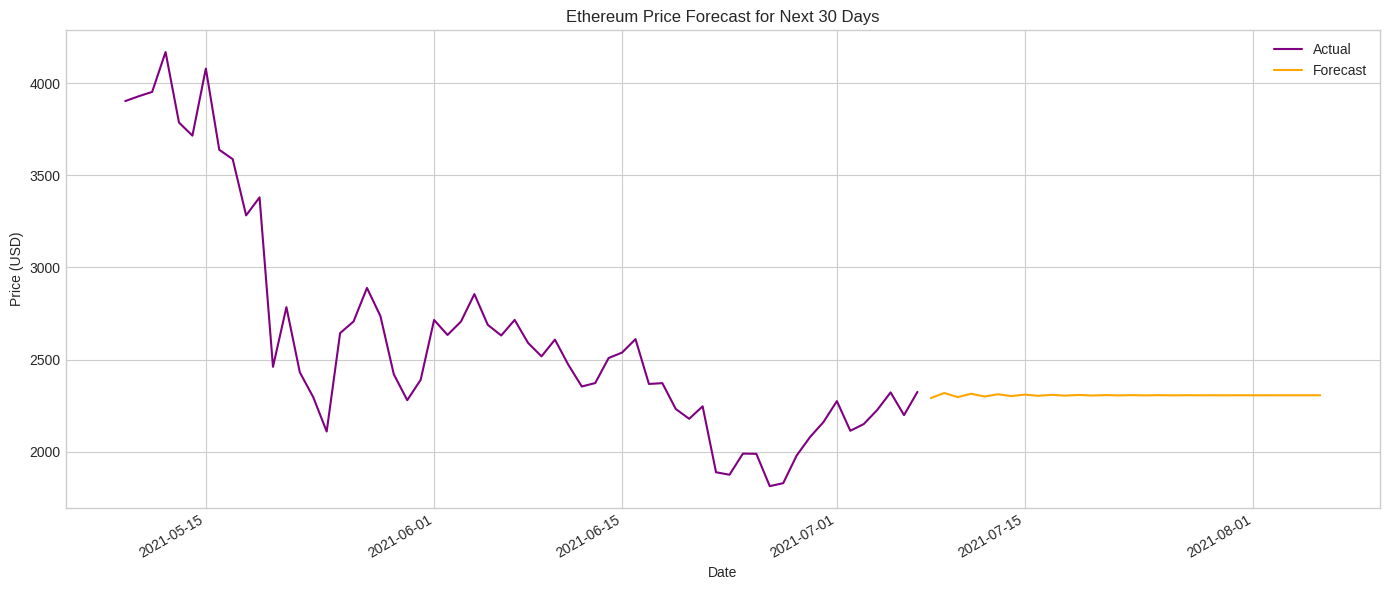

In [18]:
plt.figure(figsize=(14,6))

# Plot last 60 days of real data
df['Close'].tail(60).plot(label='Actual', color='purple')

# Plot forecasted future prices
forecast_df['Forecast'].plot(label='Forecast', color='orange')

plt.title('Ethereum Price Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()
